In [10]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 예제 데이터 (심리 설문 데이터)
data = pd.read_csv("../calculated/sentiment/amazon_sentiment.csv")

# object 타입 변수 목록 출력
removed_columns = data.select_dtypes(include=['object']).columns.tolist()
print("제거된 열:", removed_columns)

# object 타입 변수 제거
data_cleaned = data.select_dtypes(exclude=['object'])

data_cleaned

제거된 열: ['product_name', 'review_title', 'Review_Text']


,Num_of_Ratings,Rating,Helpfulness,is_photo,price,time_elapsed,Average_Rating,title_length,text_length,Deviation of star ratings,FOG Index,Flesch Reading Ease,depth,breadth,valence,sentiment_score_discrete,arousal
0,27618,5,0,0,34.95,348,4.6,4,38,0.4,6.96,78.75,0.732797,0.589597,4.753,5,-0.364289
1,27618,1,0,0,34.95,218,4.6,3,18,3.6,3.40,88.23,0.565473,0.672635,1.103,1,-0.078554
2,27618,3,1,0,34.95,627,4.6,6,39,1.6,7.00,78.45,0.558190,0.688002,4.002,4,0.099952
3,27618,5,0,0,34.95,1089,4.6,1,8,0.4,6.60,33.58,0.415284,0.762691,4.917,5,0.378918
4,27618,4,0,0,34.95,1046,4.6,4,22,0.6,12.01,64.07,0.375987,0.733197,4.365,4,0.109594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89922,43430,5,0,0,19.99,435,4.6,7,10,0.4,10.00,66.40,0.219230,0.948739,4.722,5,0.005940
89923,43430,5,0,0,19.99,290,4.6,3,11,0.4,9.47,74.35,0.560623,0.647463,4.890,5,0.102818
89924,43430,5,0,0,19.99,763,4.6,4,17,0.4,4.07,67.11,0.511836,0.700617,4.870,5,0.084424
89925,43430,5,0,0,19.99,804,4.6,2,7,0.4,8.51,64.37,0.684332,1.201002,4.631,5,0.056716


KMO Test: 0.6923894087096513, Bartlett’s Test p-value: 0.0

요인 부하량 (Factor Loadings):
                                  0         1
Num_of_Ratings            -0.013720  0.035242
Rating                     0.556718  0.788286
Helpfulness               -0.029804 -0.021161
is_photo                  -0.007835 -0.022830
price                     -0.008007 -0.020062
time_elapsed               0.061371  0.025106
Average_Rating             0.122480  0.208865
title_length              -0.133155 -0.062704
text_length               -0.170239 -0.049180
Deviation of star ratings -0.459598 -0.885309
FOG Index                 -0.011300 -0.003272
Flesch Reading Ease        0.007831  0.018584
depth                      0.057429  0.045403
breadth                    0.137356  0.026858
valence                    0.898102  0.434076
sentiment_score_discrete   0.874007  0.419753
arousal                    0.217692 -0.009972

공통성 (Communalities):
                           Communality
Num_of_Ratings           

/opt/homebrew/Cellar/jupyterlab/4.3.3/libexec/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


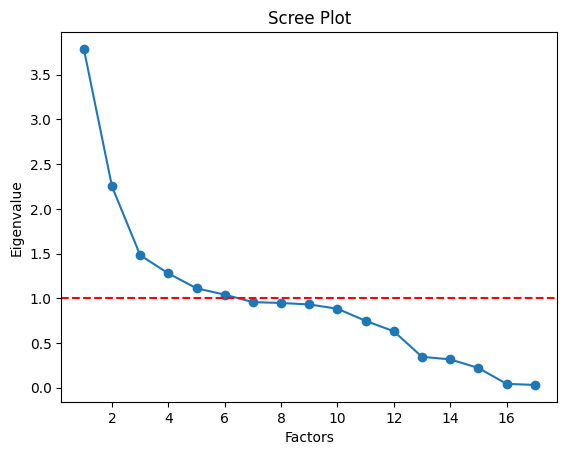

In [11]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# KMO 및 Bartlett 검정
kmo_all, kmo_model = calculate_kmo(data_scaled)
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"KMO Test: {kmo_model}, Bartlett’s Test p-value: {p_value}")

# 요인 분석 실행 (요인 개수 = 2개)
fa = FactorAnalyzer(n_factors=2, method='ml', rotation='varimax')
fa.fit(data_scaled)

# 요인 부하량(Factor Loadings) 출력
loadings = pd.DataFrame(fa.loadings_, index=data_cleaned.columns)
print("\n요인 부하량 (Factor Loadings):")
print(loadings)  

# 공통성(Communalities) 출력
communalities = pd.DataFrame(fa.get_communalities(), index=data_cleaned.columns, columns=["Communality"])
print("\n공통성 (Communalities):")
print(communalities) 

# 스크리 플롯 (참고용, 실제 요인 개수는 2개로 고정)
eigenvalues, _ = fa.get_eigenvalues()
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--')  # 기준선 추가
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()
